In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

veri = pd.read_csv("/content/AirPassengers.csv")
print(veri)

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


In [ ]:
veri.set_index(pd.date_range("01-01-1949",periods=len(veri),freq="M"),inplace=True)
veri.drop("Month",axis=1,inplace=True)
veri.columns = ["YolcuSayisi"]
print(veri)

            YolcuSayisi
1949-01-31          112
1949-02-28          118
1949-03-31          132
1949-04-30          129
1949-05-31          121
...                 ...
1960-08-31          606
1960-09-30          508
1960-10-31          461
1960-11-30          390
1960-12-31          432

[144 rows x 1 columns]


/tmp/ipython-input-8-824186639.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  veri.set_index(pd.date_range("01-01-1949",periods=len(veri),freq="M"),inplace=True)


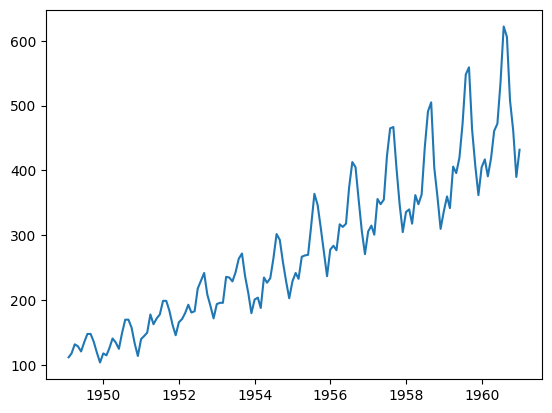

In [ ]:
plt.plot(veri)
plt.show()

In [ ]:
print(veri.isnull().sum())

YolcuSayisi    0
dtype: int64


In [ ]:
print(veri.dtypes)
print(veri.index.dtype)

YolcuSayisi    int64
dtype: object
datetime64[ns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
veri_sc = sc.fit_transform(veri)
print(veri_sc)
print(type(veri_sc))

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]
 [0.1042471 ]
 [0.05598456]
 [0.01930502]
 [0.06949807]
 [0.07915058]
 [0.08880309]
 [0.14285714]
 [0.11389961]
 [0.13127413]
 [0.14285714]
 [0.18339768]
 [0.18339768]
 [0.15444015]
 [0.11196911]
 [0.08108108]
 [0.11969112]
 [0.12934363]
 [0.14671815]
 [0.17181467]
 [0.14864865]
 [0.15250965]
 [0.22007722]
 [0.24324324]
 [0.26640927]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374517]
 [0.17760618]
 [0.17760618]
 [0.25482625]
 [0.25289575]
 [0.24131274]
 [0.26833977]
 [0.30888031]
 [0.32432432]
 [0.25675676]
 [0.20656371]
 [0.14671815]
 [0.18725869]
 [0.19305019]
 [0.16216216]
 [0.25289575]
 [0.23745174]
 [0.25096525]
 [0.30888031]
 [0.38223938]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.19111969]
 [0.24

In [ ]:
print(veri_sc.shape)

(144, 1)


In [ ]:
train_size = int(veri_sc.shape[0]*0.7)
train,test = veri_sc[0:train_size],veri_sc[train_size:]
print(train.shape)
print(test.shape)

(100, 1)
(44, 1)


In [ ]:
import numpy as np

def ts(data,time_step):
  x,y = [],[]
  for i in range(time_step,len(data)):
    x.append(data[(i-time_step):i,0])
    y.append(data[i,0])
  return np.array(x),np.array(y)

x_train,y_train = ts(train,2)
x_test,y_test = ts(test,2)

x_train = np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
x_test = np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(98, 1, 2) (98, 1) (42, 1, 2) (42, 1)


Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0641
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0625
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0564
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0545
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0536
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0469 
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0488 
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0448
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0403
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0390
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0357
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0347 
Epoch 13/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0335
Epoch 14/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0321
Epoch 15/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0306 
Epoch 16/150
4/4 ━━

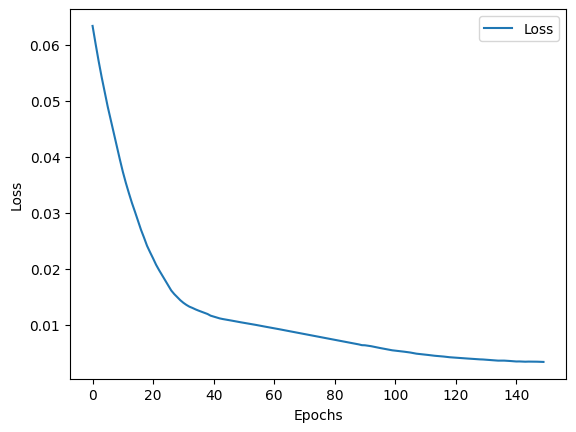

In [ ]:
from inspect import modulesbyfile
from keras.models import Sequential
from keras.layers import LSTM,Dense



model = Sequential()
model.add(LSTM(8,input_shape=(x_train.shape[1],2)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")
history = model.fit(x_train,y_train,epochs=150)
history = history.history["loss"]


plt.plot(history,label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

traintahmin = model.predict(x_train)
testtahmin = model.predict(x_test)

traintahmin = sc.inverse_transform(traintahmin)
testtahmin = sc.inverse_transform(testtahmin)
y_train = sc.inverse_transform(y_train)
y_test = sc.inverse_transform(y_test)

rmse_train = np.sqrt(mean_squared_error(y_train,traintahmin))
rmse_test = np.sqrt(mean_squared_error(y_test,testtahmin))

print(rmse_train)
print(rmse_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
29.80334291809638
63.56333039869095


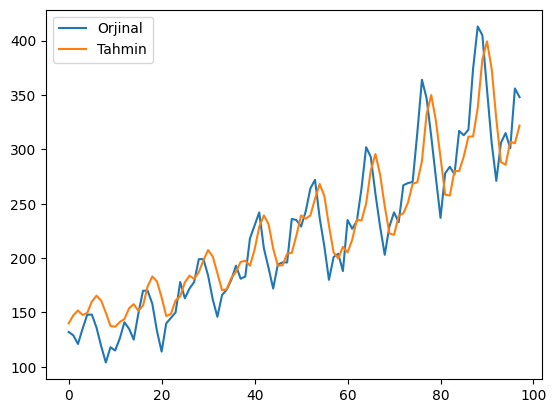

In [ ]:
plt.plot(y_train,label="Orjinal")
plt.plot(traintahmin,label="Tahmin")
plt.legend()
plt.show()